In [20]:
import numpy as np
import pandas as pd

In [21]:
##Importação dos dados de treino

In [22]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [23]:
##Remoção de colunas inteiramente preenchidas por NaN

In [24]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [25]:
##Introdução do cabeçalho do data frame

In [26]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [27]:
##Geração de Histogramas e seleção de variáveis

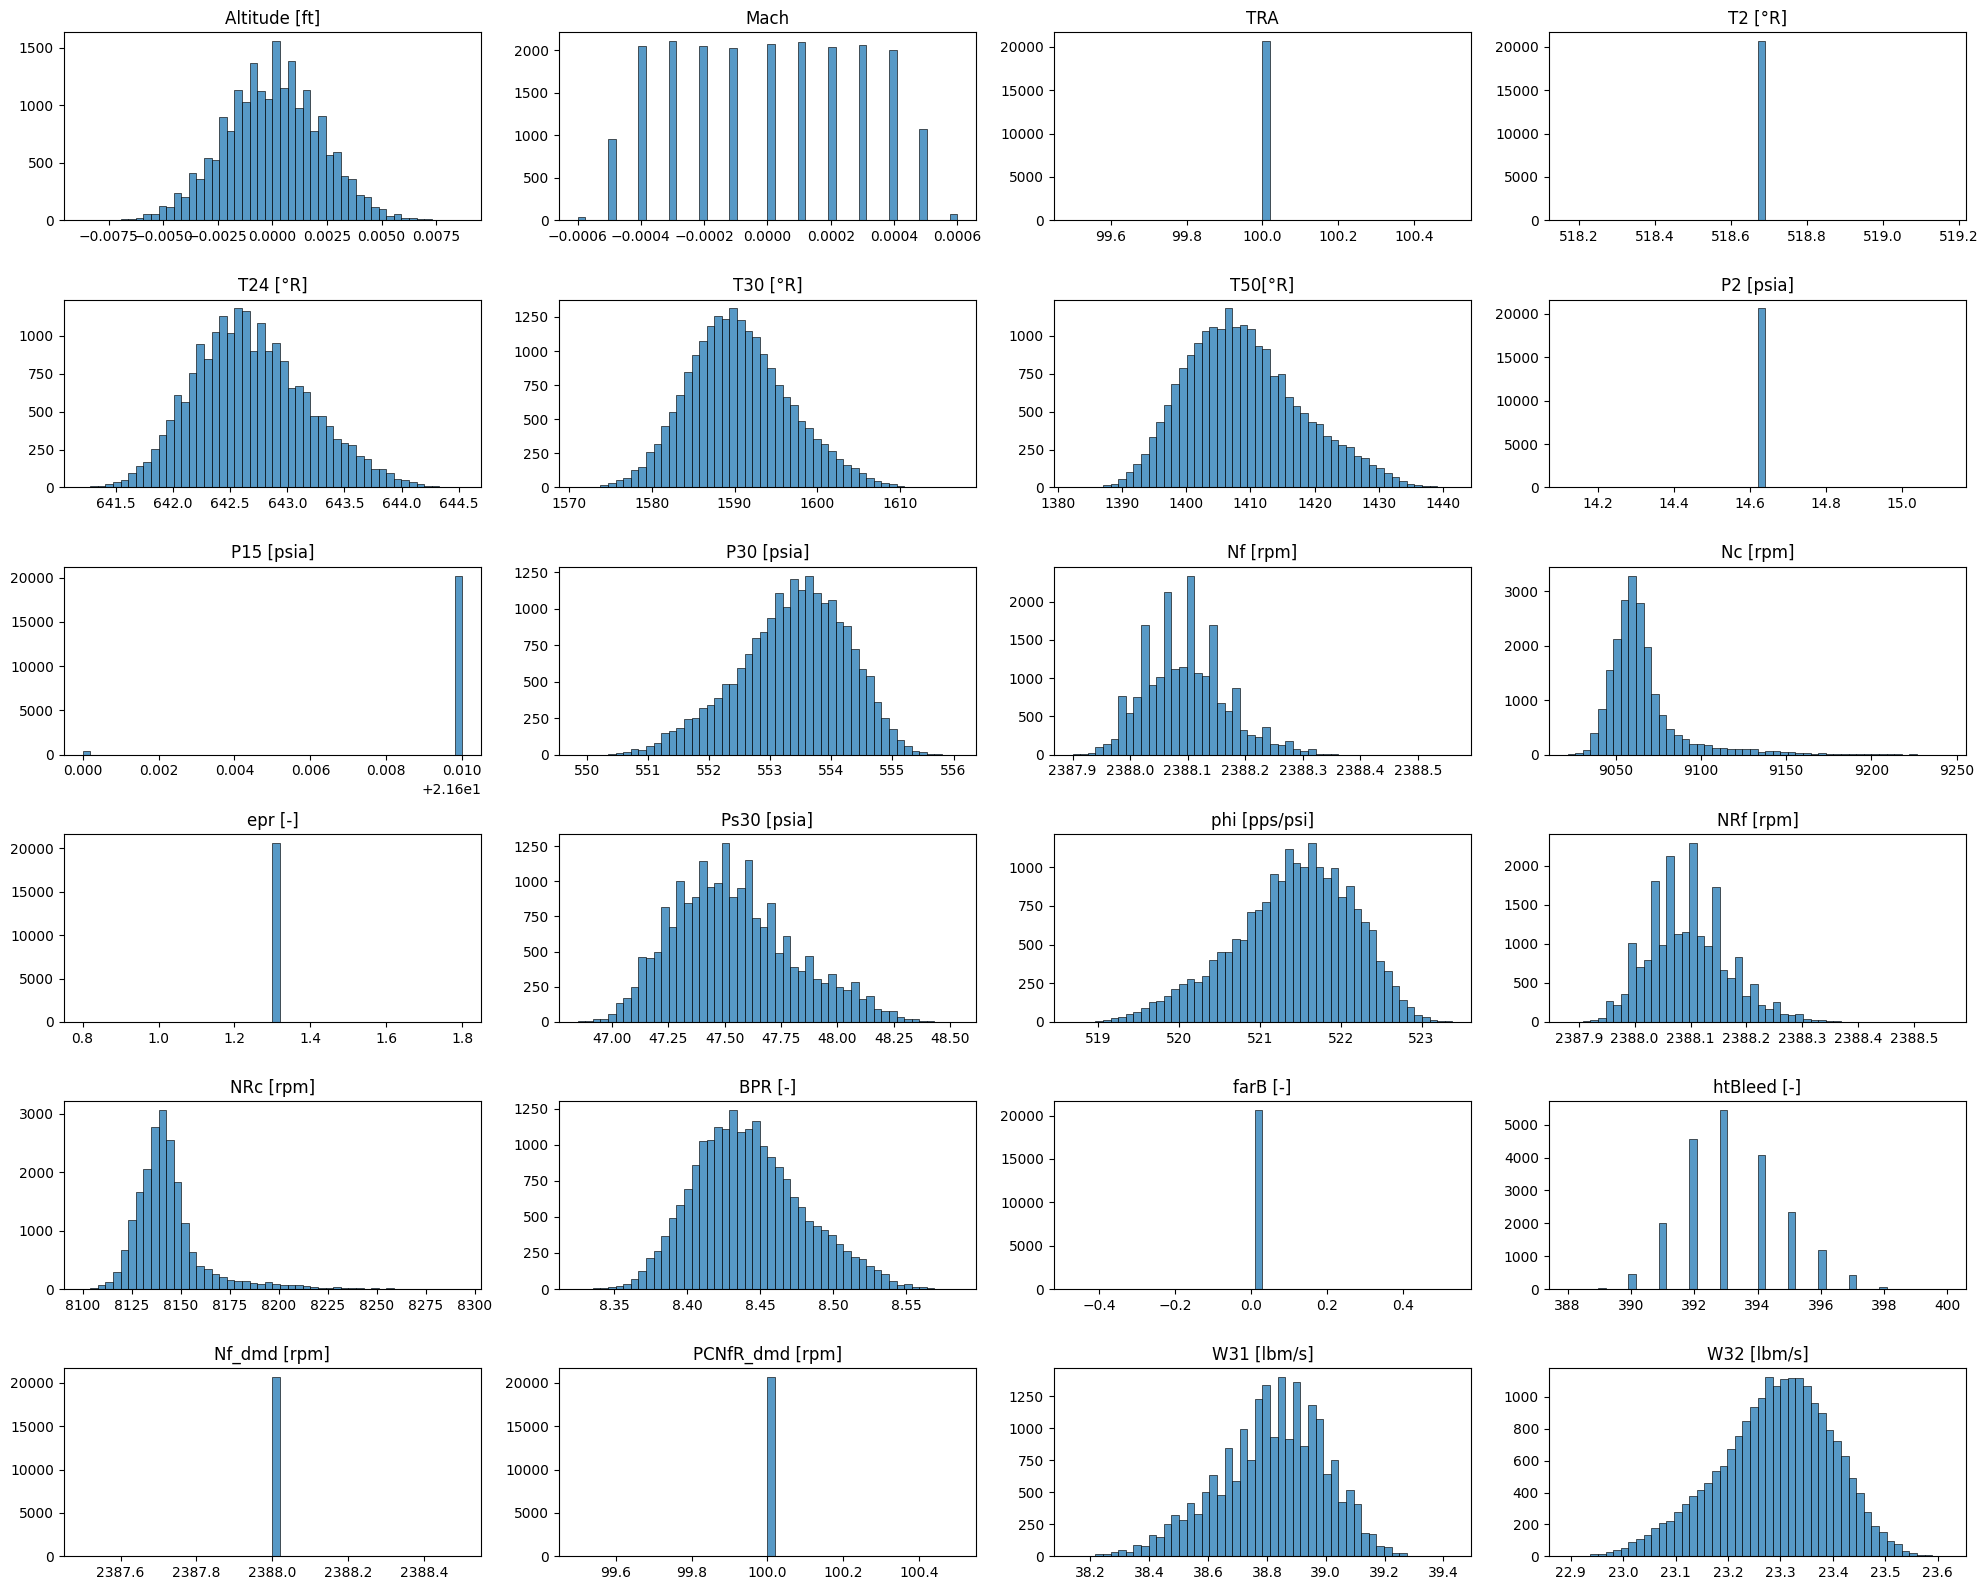

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [29]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [30]:
##Normalização

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [33]:
##Definição dos targets para regressão e classificação nos dados de treino

In [34]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [35]:
##Visualização de um ciclo de vida de um motor

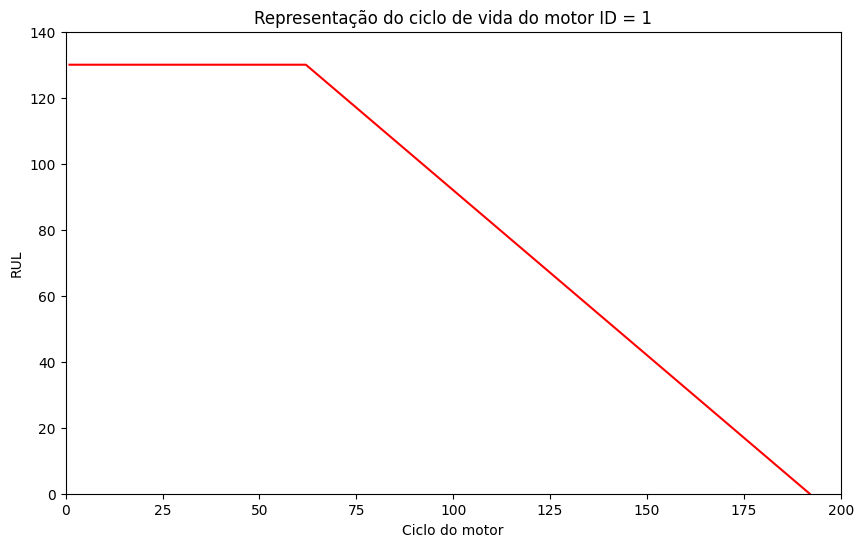

In [36]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [37]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [38]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [39]:
##Criação das janelas de tempo para dados de treino e de teste

In [40]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [41]:
##Separação das variáveis de treino e teste

In [42]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [43]:
##Criação do modelo LSTM

In [44]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 4033.6765 - mean_absolute_error: 52.3902 - mean_squared_error: 4033.6765

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - loss: 2373.7566 - mean_absolute_error: 40.1947 - mean_squared_error: 2373.7566 - val_loss: 1283.4493 - val_mean_absolute_error: 30.3103 - val_mean_squared_error: 1283.4493
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 938.0606 - mean_absolute_error: 24.9655 - mean_squared_error: 938.0606

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - loss: 857.2504 - mean_absolute_error: 23.4348 - mean_squared_error: 857.2504 - val_loss: 584.7601 - val_mean_absolute_error: 19.7098 - val_mean_squared_error: 584.7601
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 674.7556 - mean_absolute_error: 20.4131 - mean_squared_error: 674.7556

71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 225ms/step - loss: 667.9445 - mean_absolute_error: 20.1516 - mean_squared_error: 667.9444 - val_loss: 431.6195 - val_mean_absolute_error: 16.9223 - val_mean_squared_error: 431.6195
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 558.6203 - mean_absolute_error: 18.2984 - mean_squared_error: 558.6203

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - loss: 547.0635 - mean_absolute_error: 18.1091 - mean_squared_error: 547.0635 - val_loss: 588.6514 - val_mean_absolute_error: 18.9835 - val_mean_squared_error: 588.6514
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 489.1670 - mean_absolute_error: 17.0378 - mean_squared_error: 489.1670

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - loss: 471.8935 - mean_absolute_error: 16.8058 - mean_squared_error: 471.8935 - val_loss: 284.6310 - val_mean_absolute_error: 13.2676 - val_mean_squared_error: 284.6310
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 436.8098 - mean_absolute_error: 16.1520 - mean_squared_error: 436.8098

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - loss: 427.3286 - mean_absolute_error: 15.9457 - mean_squared_error: 427.3286 - val_loss: 292.8166 - val_mean_absolute_error: 13.6918 - val_mean_squared_error: 292.8166
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 423.8600 - mean_absolute_error: 15.8577 - mean_squared_error: 423.8600

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - loss: 398.7093 - mean_absolute_error: 15.3767 - mean_squared_error: 398.7093 - val_loss: 258.1192 - val_mean_absolute_error: 11.8780 - val_mean_squared_error: 258.1192
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 399.0356 - mean_absolute_error: 15.2142 - mean_squared_error: 399.0356

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 384.8401 - mean_absolute_error: 15.0140 - mean_squared_error: 384.8401 - val_loss: 481.6545 - val_mean_absolute_error: 15.5539 - val_mean_squared_error: 481.6545
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 368.2239 - mean_absolute_error: 14.6625 - mean_squared_error: 368.2239

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - loss: 361.9666 - mean_absolute_error: 14.5436 - mean_squared_error: 361.9666 - val_loss: 275.4805 - val_mean_absolute_error: 12.3986 - val_mean_squared_error: 275.4805
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 367.9543 - mean_absolute_error: 14.6279 - mean_squared_error: 367.9543

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - loss: 360.6704 - mean_absolute_error: 14.4748 - mean_squared_error: 360.6704 - val_loss: 242.4013 - val_mean_absolute_error: 11.6303 - val_mean_squared_error: 242.4013
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 330.6602 - mean_absolute_error: 13.8571 - mean_squared_error: 330.6602

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - loss: 337.4605 - mean_absolute_error: 13.9802 - mean_squared_error: 337.4605 - val_loss: 231.0403 - val_mean_absolute_error: 11.9194 - val_mean_squared_error: 231.0403
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 335.2856 - mean_absolute_error: 13.9163 - mean_squared_error: 335.2856

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - loss: 330.2358 - mean_absolute_error: 13.7763 - mean_squared_error: 330.2358 - val_loss: 246.2572 - val_mean_absolute_error: 12.1829 - val_mean_squared_error: 246.2572
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 327.8107 - mean_absolute_error: 13.6297 - mean_squared_error: 327.8107

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - loss: 322.3773 - mean_absolute_error: 13.5596 - mean_squared_error: 322.3773 - val_loss: 242.0819 - val_mean_absolute_error: 11.9275 - val_mean_squared_error: 242.0819
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 308.9666 - mean_absolute_error: 13.2588 - mean_squared_error: 308.9666

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - loss: 314.2325 - mean_absolute_error: 13.3766 - mean_squared_error: 314.2325 - val_loss: 227.4223 - val_mean_absolute_error: 10.9219 - val_mean_squared_error: 227.4223
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 301.9998 - mean_absolute_error: 13.1499 - mean_squared_error: 301.9998

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - loss: 305.7873 - mean_absolute_error: 13.1951 - mean_squared_error: 305.7873 - val_loss: 228.1340 - val_mean_absolute_error: 10.6592 - val_mean_squared_error: 228.1340
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 317.6965 - mean_absolute_error: 13.4072 - mean_squared_error: 317.6965

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - loss: 309.1500 - mean_absolute_error: 13.2734 - mean_squared_error: 309.1500 - val_loss: 273.9753 - val_mean_absolute_error: 11.4674 - val_mean_squared_error: 273.9753
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 309.2555 - mean_absolute_error: 13.2418 - mean_squared_error: 309.2555

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - loss: 298.3399 - mean_absolute_error: 13.0156 - mean_squared_error: 298.3399 - val_loss: 313.0018 - val_mean_absolute_error: 13.2032 - val_mean_squared_error: 313.0018
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 291.1636 - mean_absolute_error: 12.9011 - mean_squared_error: 291.1637

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - loss: 294.2344 - mean_absolute_error: 12.9354 - mean_squared_error: 294.2344 - val_loss: 277.6450 - val_mean_absolute_error: 12.4470 - val_mean_squared_error: 277.6450
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 287.3785 - mean_absolute_error: 12.7512 - mean_squared_error: 287.3784

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 288.3474 - mean_absolute_error: 12.7409 - mean_squared_error: 288.3474 - val_loss: 231.8802 - val_mean_absolute_error: 10.4854 - val_mean_squared_error: 231.8802


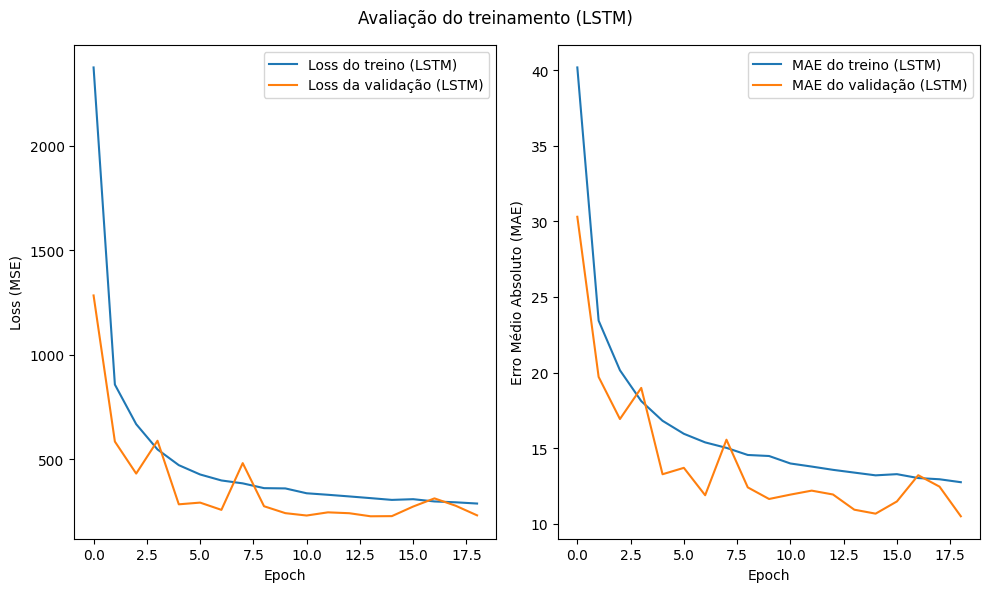

In [46]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [47]:
##Testando o modelo com os dados de teste 

In [48]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step


In [49]:
##Avaliando o modelo

251.57578199394487
15.86
0.12913201398747035
10.958902129008285
0.7459691848216579
Tempo de 331.17779636383057s


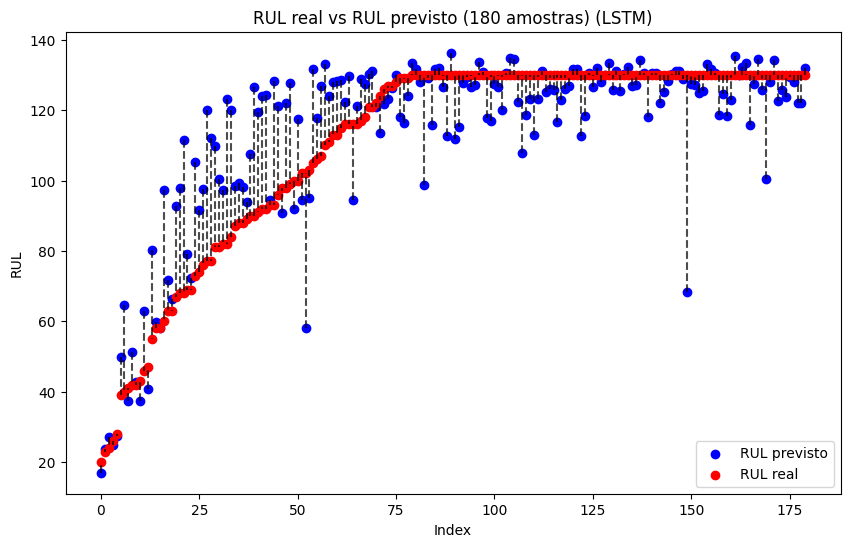

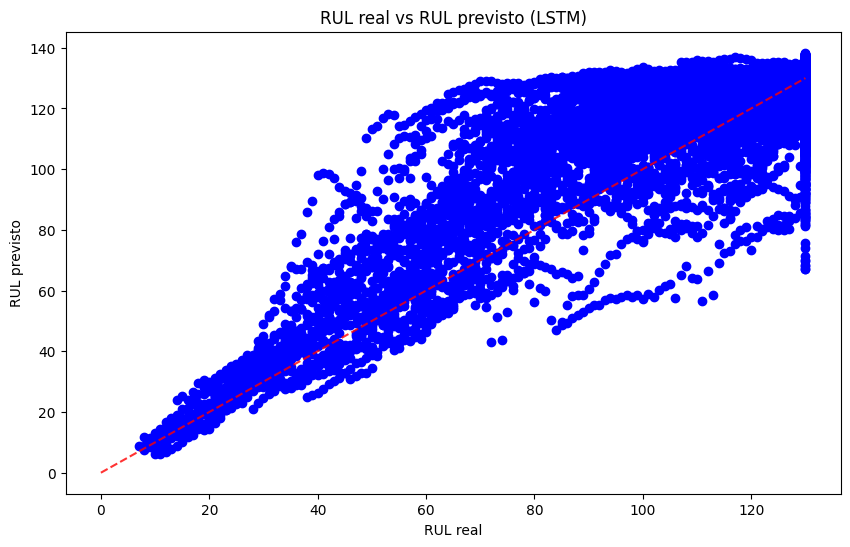

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [51]:
##Criando modelo BiLSTM

In [52]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6257.9033 - mean_absolute_error: 67.7428 - mean_squared_error: 6257.9033

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 4532.6621 - mean_absolute_error: 56.7410 - mean_squared_error: 4532.6621 - val_loss: 2126.9277 - val_mean_absolute_error: 40.9763 - val_mean_squared_error: 2126.9277
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1934.0098 - mean_absolute_error: 38.7551 - mean_squared_error: 1934.0098

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 1636.8312 - mean_absolute_error: 35.1422 - mean_squared_error: 1636.8312 - val_loss: 1010.3954 - val_mean_absolute_error: 27.4260 - val_mean_squared_error: 1010.3954
Epoch 3/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 778.6058 - mean_absolute_error: 22.7799 - mean_squared_error: 778.6058

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 717.3114 - mean_absolute_error: 21.6584 - mean_squared_error: 717.3114 - val_loss: 437.7170 - val_mean_absolute_error: 17.0108 - val_mean_squared_error: 437.7170
Epoch 4/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 642.1512 - mean_absolute_error: 19.9956 - mean_squared_error: 642.1512

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 614.6347 - mean_absolute_error: 19.5376 - mean_squared_error: 614.6347 - val_loss: 671.9056 - val_mean_absolute_error: 20.7033 - val_mean_squared_error: 671.9056
Epoch 5/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 569.6434 - mean_absolute_error: 18.6530 - mean_squared_error: 569.6434

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 546.4133 - mean_absolute_error: 18.2523 - mean_squared_error: 546.4133 - val_loss: 448.2522 - val_mean_absolute_error: 15.8149 - val_mean_squared_error: 448.2522
Epoch 6/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 530.2428 - mean_absolute_error: 17.9347 - mean_squared_error: 530.2429

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 524.9684 - mean_absolute_error: 17.8511 - mean_squared_error: 524.9684 - val_loss: 494.4249 - val_mean_absolute_error: 17.4546 - val_mean_squared_error: 494.4249
Epoch 7/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 490.5437 - mean_absolute_error: 17.3490 - mean_squared_error: 490.5437

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 484.8566 - mean_absolute_error: 17.2479 - mean_squared_error: 484.8566 - val_loss: 384.2352 - val_mean_absolute_error: 15.0081 - val_mean_squared_error: 384.2352
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 491.5782 - mean_absolute_error: 17.2220 - mean_squared_error: 491.5782

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 477.9504 - mean_absolute_error: 17.0550 - mean_squared_error: 477.9504 - val_loss: 383.2753 - val_mean_absolute_error: 15.4378 - val_mean_squared_error: 383.2753
Epoch 9/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 463.8158 - mean_absolute_error: 16.7951 - mean_squared_error: 463.8157

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 450.1882 - mean_absolute_error: 16.5546 - mean_squared_error: 450.1882 - val_loss: 314.7530 - val_mean_absolute_error: 13.8438 - val_mean_squared_error: 314.7530
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 460.0591 - mean_absolute_error: 16.7171 - mean_squared_error: 460.0591

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 443.0165 - mean_absolute_error: 16.3719 - mean_squared_error: 443.0165 - val_loss: 297.7380 - val_mean_absolute_error: 13.4853 - val_mean_squared_error: 297.7380
Epoch 11/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 419.5309 - mean_absolute_error: 15.9033 - mean_squared_error: 419.5309

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 420.5245 - mean_absolute_error: 15.8976 - mean_squared_error: 420.5245 - val_loss: 369.0292 - val_mean_absolute_error: 15.3434 - val_mean_squared_error: 369.0292
Epoch 12/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 396.8663 - mean_absolute_error: 15.5017 - mean_squared_error: 396.8663

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 398.3260 - mean_absolute_error: 15.4990 - mean_squared_error: 398.3260 - val_loss: 300.5796 - val_mean_absolute_error: 13.3322 - val_mean_squared_error: 300.5796
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 383.6778 - mean_absolute_error: 15.1963 - mean_squared_error: 383.6778

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 382.2360 - mean_absolute_error: 15.1552 - mean_squared_error: 382.2360 - val_loss: 264.6923 - val_mean_absolute_error: 12.4191 - val_mean_squared_error: 264.6923
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 376.0496 - mean_absolute_error: 14.8793 - mean_squared_error: 376.0496

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 385.6868 - mean_absolute_error: 15.1248 - mean_squared_error: 385.6868 - val_loss: 257.3488 - val_mean_absolute_error: 12.2644 - val_mean_squared_error: 257.3488
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 372.0780 - mean_absolute_error: 14.8230 - mean_squared_error: 372.0780

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 369.2219 - mean_absolute_error: 14.7624 - mean_squared_error: 369.2219 - val_loss: 282.6896 - val_mean_absolute_error: 12.7156 - val_mean_squared_error: 282.6896
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 361.0277 - mean_absolute_error: 14.6891 - mean_squared_error: 361.0277

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 360.9670 - mean_absolute_error: 14.6581 - mean_squared_error: 360.9670 - val_loss: 231.9975 - val_mean_absolute_error: 11.1300 - val_mean_squared_error: 231.9975
Epoch 17/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 365.7766 - mean_absolute_error: 14.6292 - mean_squared_error: 365.7766

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 357.8275 - mean_absolute_error: 14.5500 - mean_squared_error: 357.8275 - val_loss: 236.1149 - val_mean_absolute_error: 11.2817 - val_mean_squared_error: 236.1149
Epoch 18/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 341.9984 - mean_absolute_error: 14.1764 - mean_squared_error: 341.9984

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 340.8886 - mean_absolute_error: 14.1700 - mean_squared_error: 340.8886 - val_loss: 243.0126 - val_mean_absolute_error: 11.9456 - val_mean_squared_error: 243.0126
Epoch 19/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 344.0597 - mean_absolute_error: 14.1753 - mean_squared_error: 344.0597

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 348.7696 - mean_absolute_error: 14.2887 - mean_squared_error: 348.7696 - val_loss: 226.5266 - val_mean_absolute_error: 11.3074 - val_mean_squared_error: 226.5266
Epoch 20/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 336.3418 - mean_absolute_error: 13.9579 - mean_squared_error: 336.3418

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 338.0384 - mean_absolute_error: 14.0202 - mean_squared_error: 338.0384 - val_loss: 223.8276 - val_mean_absolute_error: 11.2841 - val_mean_squared_error: 223.8276
Epoch 21/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 326.9457 - mean_absolute_error: 13.8898 - mean_squared_error: 326.9457

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 328.5703 - mean_absolute_error: 13.9010 - mean_squared_error: 328.5703 - val_loss: 220.7374 - val_mean_absolute_error: 11.2870 - val_mean_squared_error: 220.7374
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 330.7914 - mean_absolute_error: 13.8484 - mean_squared_error: 330.7914

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 329.4336 - mean_absolute_error: 13.7941 - mean_squared_error: 329.4336 - val_loss: 244.2591 - val_mean_absolute_error: 12.4071 - val_mean_squared_error: 244.2591
Epoch 23/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 333.3997 - mean_absolute_error: 13.8753 - mean_squared_error: 333.3997

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 323.2556 - mean_absolute_error: 13.5941 - mean_squared_error: 323.2557 - val_loss: 240.4167 - val_mean_absolute_error: 11.7752 - val_mean_squared_error: 240.4167
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 322.5317 - mean_absolute_error: 13.6294 - mean_squared_error: 322.5317

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 321.2711 - mean_absolute_error: 13.5766 - mean_squared_error: 321.2711 - val_loss: 253.6679 - val_mean_absolute_error: 12.5563 - val_mean_squared_error: 253.6679
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 311.9432 - mean_absolute_error: 13.4696 - mean_squared_error: 311.9432

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 315.5654 - mean_absolute_error: 13.4887 - mean_squared_error: 315.5654 - val_loss: 217.3727 - val_mean_absolute_error: 11.2453 - val_mean_squared_error: 217.3727
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 324.3579 - mean_absolute_error: 13.5785 - mean_squared_error: 324.3579

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 319.2324 - mean_absolute_error: 13.5265 - mean_squared_error: 319.2324 - val_loss: 219.9919 - val_mean_absolute_error: 10.9871 - val_mean_squared_error: 219.9919
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 308.1018 - mean_absolute_error: 13.1754 - mean_squared_error: 308.1018

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 304.4843 - mean_absolute_error: 13.2133 - mean_squared_error: 304.4843 - val_loss: 205.7971 - val_mean_absolute_error: 10.5799 - val_mean_squared_error: 205.7971
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 308.0879 - mean_absolute_error: 13.2817 - mean_squared_error: 308.0879

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 304.9398 - mean_absolute_error: 13.2292 - mean_squared_error: 304.9398 - val_loss: 224.3749 - val_mean_absolute_error: 11.0234 - val_mean_squared_error: 224.3749
Epoch 29/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 314.6054 - mean_absolute_error: 13.3397 - mean_squared_error: 314.6054

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 301.8108 - mean_absolute_error: 13.0841 - mean_squared_error: 301.8108 - val_loss: 201.0190 - val_mean_absolute_error: 10.6154 - val_mean_squared_error: 201.0190
Epoch 30/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 297.5018 - mean_absolute_error: 13.0537 - mean_squared_error: 297.5018

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 300.1794 - mean_absolute_error: 13.0796 - mean_squared_error: 300.1794 - val_loss: 204.0126 - val_mean_absolute_error: 10.6412 - val_mean_squared_error: 204.0126


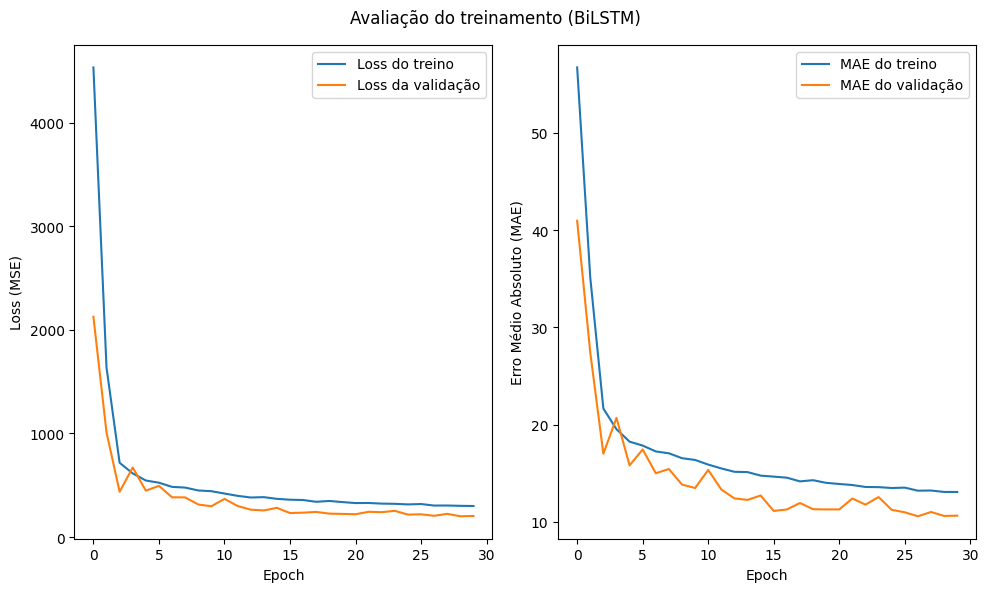

In [54]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [55]:
##Testando o modelo com os dados de teste

In [56]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [57]:
##Avaliando o modelo

259.12679415880444
16.10
0.12867059019532337
12.4189451431564
0.7383444851766539
Tempo de 91.83301877975464s


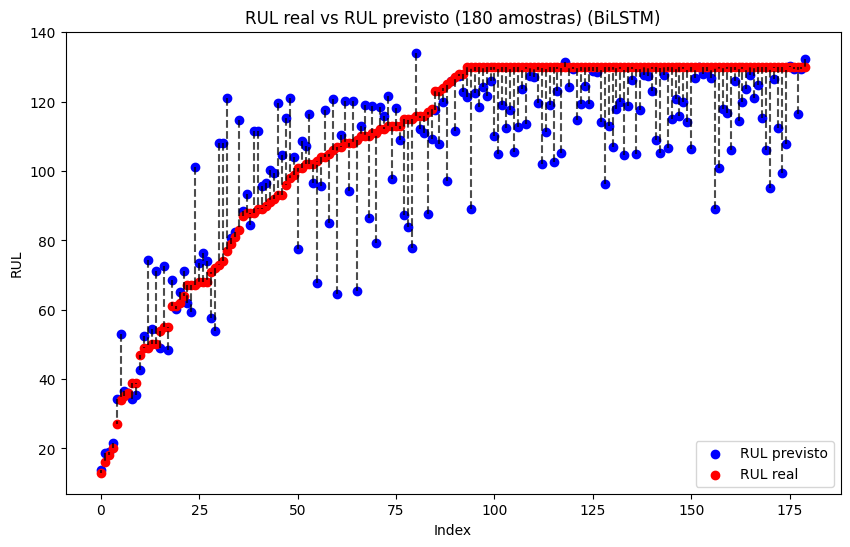

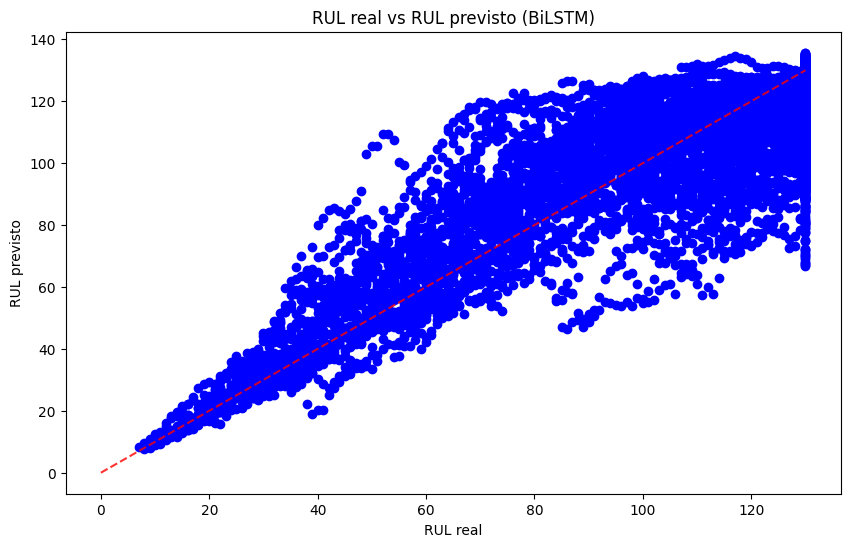

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()